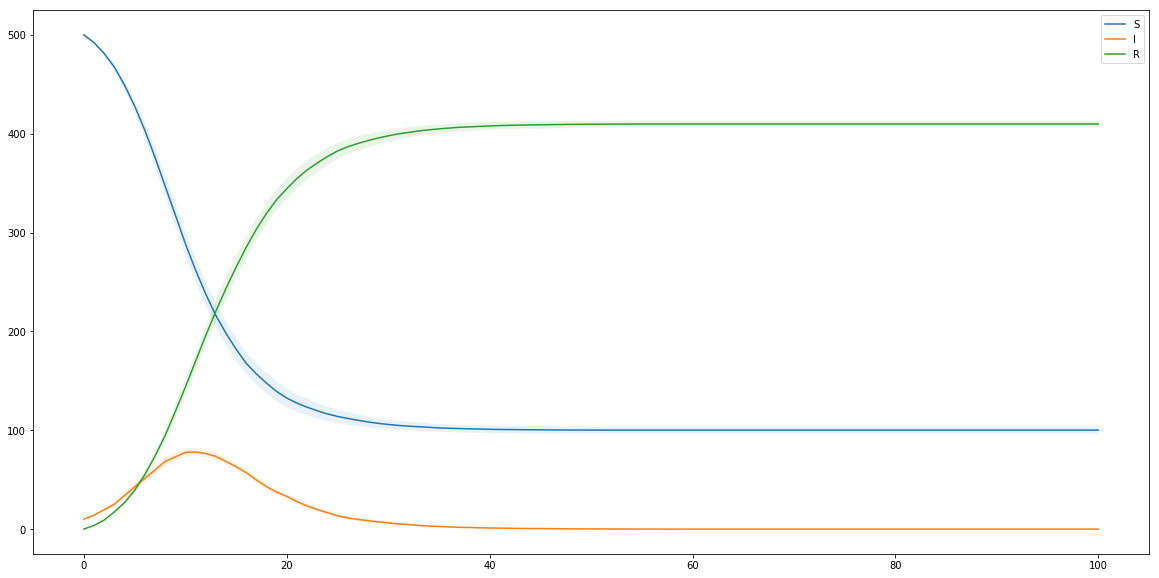

In [6]:
import numpy as np
import itertools
import math
from tqdm import tqdm_notebook
import pandas as pd
import matplotlib.pyplot as plt
import PetriNet

SV = ["S", "I", "R"]
SV0 = ["500", "10", "0"]
C = ["gamma", "rho", "mu", "beta"]
CVals = ["1.0/3.0", "2.0", "0.0", "gamma*rho"]
Phi = ["(S > 0) and (I > 0)", "I > 0", "R > 0"]
Delta = [("S = S - 1", "I = I + 1"), ("I = I - 1", "R = R + 1"), ("R = R - 1", "S = S + 1")]
Lambda = ["beta * float(S) * float(I) / float(S+I+R)", "gamma * float(I)", "mu * float(R)"]
Measures = [("S", [0.0, 100.0, 1.0]), ("I", [0.0, 100.0, 1.0]), ("R", [0.0, 100.0, 1.0])]
t0 = 0.0
tMax = 100.0
runs = 100

results = PetriNet.metasolve(SV, SV0, C, CVals, Phi, Delta, Lambda, Measures, t0=t0, tMax=tMax, runs=runs)
fig, ax = plt.subplots(figsize=(20, 10))
for sv in SV:
    pCI = [x + y for x,y in zip(results['Mean ' + sv].tolist(), results['Confidence Interval ' + sv].tolist())]
    nCI = [x - y for x,y in zip(results['Mean ' + sv].tolist(), results['Confidence Interval ' + sv].tolist())]
    ax.plot(list(results.index), results['Mean ' + sv].tolist(), label=sv)
    ax.fill_between(list(results.index), nCI, pCI, alpha=.1)
    ax.legend()